In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
import datetime
import matplotlib.pylab as plt
import os
import seaborn as sbn
from scipy.stats import norm
from scipy.stats import lognorm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime
from dateutil import relativedelta
from scipy.optimize import fsolve


In [2]:
'''Sample data for valuation of a 5 year CDS'''
hazard_rate=0.02 # flat 2% per annum for whole 5 year life of CDS
t=[1,2,3,4,5] # 5 years
tenor=np.mean([t[i+1]-t[i] for i in range(0,len(t)-1)]) # 1 year 
r=0.05 # continous compounded risk free rate 
Notional=1 #1$
Recovery_rate=0.4


Q(t) is probability of default by time t
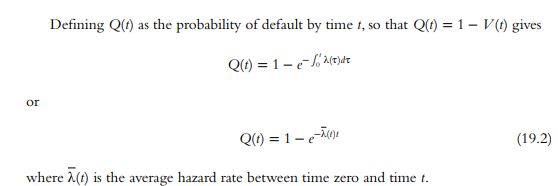

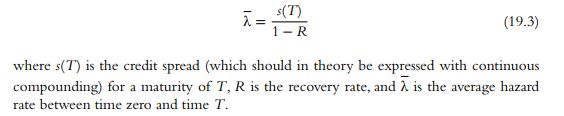

In [3]:
'''Calculation of probability of survival and probability of default'''
survival_probability = [np.exp(-hazard_rate*t[i]) for i in range(0,len(t))] #Probability of surviving to year end

PD=[]

for i in range(0,len(t)):
    if i==0:
        pd=1.0-survival_probability[i]
    else:
        pd=survival_probability[i-1]-survival_probability[i]  # Probability of survival of prev tenor - current tenor
    PD.append(pd)
    
print ('Probability of default during year:')
print(*PD,sep="\n")
print ('Probability of survival to year end:')
print(*survival_probability,sep="\n")

Probability of default during year:
0.019801326693244747
0.019409234154432076
0.019024905568074457
0.018648187197612964
0.018278928350676238
Probability of survival to year end:
0.9801986733067553
0.9607894391523232
0.9417645335842487
0.9231163463866358
0.9048374180359595


In [4]:
PV_exp_payments_factors = sum([np.exp(-r*t[i])*survival_probability[i]*Notional for i  in range(0, len(t))]) 

In [5]:
PV_exp_payments_factors # expected payment of CDS spread as per probability of survival

4.07280813244938

In [6]:
PV_accrual_payment_factors = sum([np.exp(-r*(t[i]-tenor*0.5))*PD[i]*0.5*Notional for i  in range(0, len(t))])

In [7]:
PV_accrual_payment_factors #accrued CDS spread to be paid if default happens mid of year

0.0421795067048166

In [8]:
PV_exp_payoff = sum([np.exp(-r*(t[i]-tenor*0.5))*PD[i]*(1-Recovery_rate)*Notional for i  in range(0, len(t))])

In [9]:
PV_exp_payoff # expected payoff (PD*LGD*EAD) in event of default

0.050615408045779915

In [10]:
Duration = PV_exp_payments_factors+PV_accrual_payment_factors # Duration for the CDS spread payments
Duration

4.114987639154196

In [11]:
CDS_spread=PV_exp_payoff/Duration
CDS_spread

0.012300257615399185